# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../dataset/Employee.csv')

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.groupby('Department').Salary.agg(['mean'])

,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Department'],aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Department','Title'],aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Title'],columns=['Years'],fill_value=0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Department','Title'],aggfunc={'Salary':[np.mean,'count']})

Salary      
                      count  mean
Department Title                 
HR         VP           1.0  70.0
           analyst      2.0  32.5
IT         VP           1.0  70.0
           analyst      2.0  32.5
           associate    1.0  60.0
Sales      associate    2.0  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Department','Title'],aggfunc={'Salary':[np.median,min,max,np.std]},\
              fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

To be honest, there are very few employees to derive any significant conclusion at all. 

#### Based on your comments, fill the missing values with an appropriate value.

This has been already done above.

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [9]:
# your code here
pd.pivot_table(employees,values=['Salary'],index=['Department'],aggfunc={'Salary':[sum,'count']})

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [10]:
# your code here
pd.pivot_table(employees,values=['Salary','Years'],index=['Department','Title'],aggfunc={'Salary':np.mean,'Years':sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [11]:
# your code here
def mean_max_out(array):
    arg_max = np.argmax(array)
    return array.reset_index(drop=True).drop(index=arg_max).mean()
pd.pivot_table(employees,values=['Salary'],index=['Department'],aggfunc=mean_max_out)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [12]:
# your code here
# I am testing here using lambdas functions for a weighted average
def prod_col(g,x,y):
    return (g[x]*g[y]).sum()
employees.groupby(['Department','Title']).apply(lambda g,x,y:(g[x]*g[y]).sum(),'Salary','Years')

Department  Title    
HR          VP           560
            analyst      200
IT          VP           560
            analyst       95
            associate    420
Sales       associate    275
dtype: int64

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [13]:
# your code here
fitbit = pd.read_csv('../dataset/Fitbit.csv')
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [14]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [15]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [16]:
import matplotlib.pyplot as plt;
import matplotlib.gridspec as gridspec
from scipy import stats

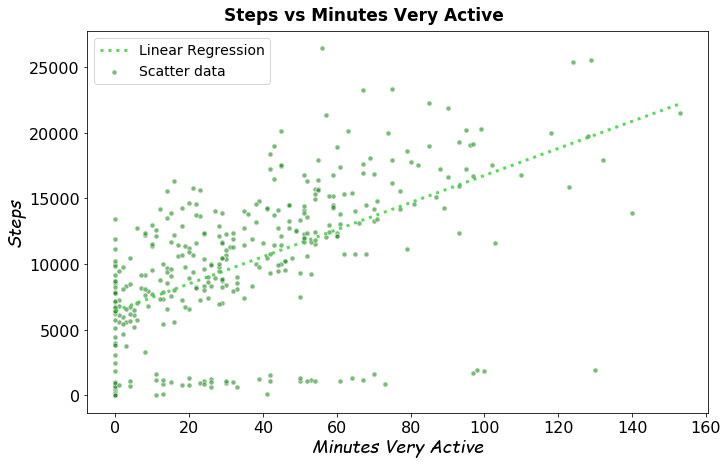

In [17]:
fig = plt.figure(figsize=[10,6],constrained_layout=True)
fig.suptitle('Steps vs Minutes Very Active', size=17, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
label_prop = {'size':18,'family':'fantasy','style':'oblique'}
axis = fig.add_subplot(spec[0,0])
x = fitbit['Minutes Very Active']
y = fitbit['Steps']
axis.scatter(x,y,s=25,alpha=0.6,marker='o',ec='whitesmoke',fc='forestgreen',label='Scatter data')
plt.sca(axis)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Minutes Very Active',fontdict=label_prop)
plt.ylabel('Steps',fontdict=label_prop)


r_l = stats.linregress(x,y)

x_est = np.linspace(x.min(),x.max())
y_est = r_l.intercept + x_est*r_l.slope

axis.plot(x_est, y_est, color='limegreen', label='Linear Regression', lw=3, ls=':',alpha=0.8)
axis.legend(fontsize=14)


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

There is an expected positive correlation between the increased active minutes and the increased number of steps.

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [18]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Steps')

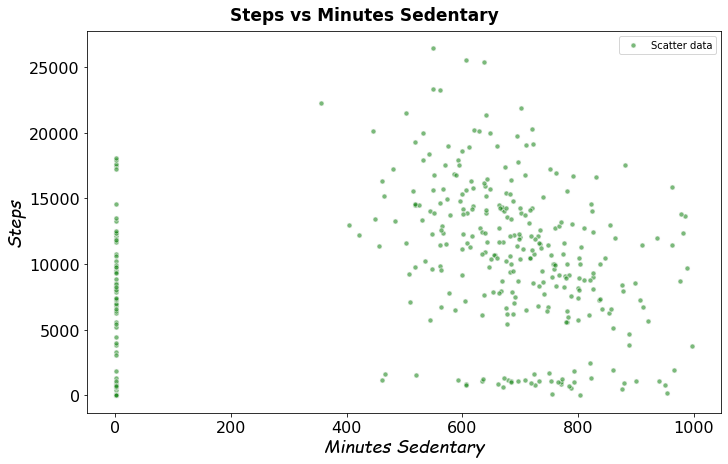

In [19]:
# your code here
fig = plt.figure(figsize=[10,6],constrained_layout=True)
fig.suptitle('Steps vs Minutes Sedentary', size=17, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
label_prop = {'size':18,'family':'fantasy','style':'oblique'}
axis = fig.add_subplot(spec[0,0])
x = 'Minutes Sedentary'
y = 'Steps'
plot_var = fitbit.plot.scatter(x,y,s=25,alpha=0.6,marker='o',ec='whitesmoke',fc='forestgreen',label='Scatter data',ax=axis)
plt.sca(plot_var)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Minutes Sedentary',fontdict=label_prop)
plt.ylabel('Steps',fontdict=label_prop)

As expected from the near zero correlation coefficient, it is likely that an increased number of sedentary minutes do not report any significant changes in the number of steps, as reported from the plot.

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [20]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Minutes of Sleep')

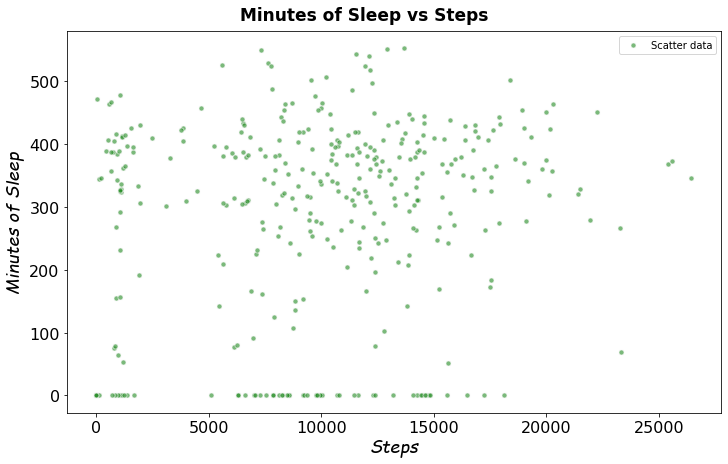

In [21]:
# your code here
fig = plt.figure(figsize=[10,6],constrained_layout=True)
fig.suptitle('Minutes of Sleep vs Steps', size=17, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
label_prop = {'size':18,'family':'fantasy','style':'oblique'}
axis = fig.add_subplot(spec[0,0])
x = 'Steps'
y = 'MinutesOfSleep'
plot_var = fitbit.plot.scatter(x,y,s=25,alpha=0.6,marker='o',ec='whitesmoke',fc='forestgreen',label='Scatter data',ax=axis)
plt.sca(plot_var)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Steps',fontdict=label_prop)
plt.ylabel('Minutes of Sleep',fontdict=label_prop)

Although the correlation is not very strong, there is a positive correlation between the number of steps

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [22]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [23]:
# your code here
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [24]:
# your code here
cor_fit.Steps.sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

The strongest correlation of `Steps` is against the variable `Minutes Very Active`. It is also correlated against `Floors` and `Calories burned`.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [25]:
# your code here
timeG = pd.read_csv('../dataset/Time_Grades.csv')
timeG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        15 non-null     object
 1   Study time  15 non-null     int64 
 2   Grade       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


#### Show visually the frequency distribution of the `time_grades` dataset.

Text(0.5, 0, 'Grades')

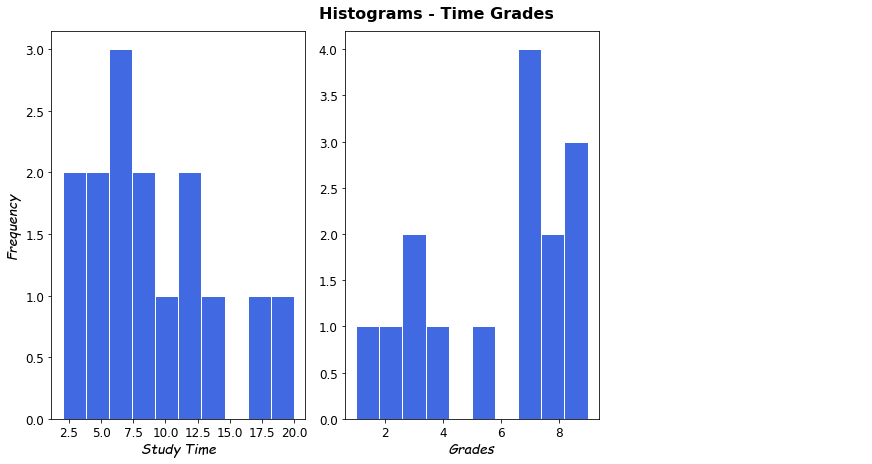

In [26]:
# your code here
fig = plt.figure(figsize=[12,6],constrained_layout=True)
fig.suptitle('Histograms - Time Grades', size=16, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax1.hist(timeG['Study time'], align='mid', ec='w',fc='royalblue')
ax2.hist(timeG.Grade, align='mid', ec='w',fc='royalblue')
plt.sca(ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}
plt.xlabel('Study Time',fontdict=label_prop)
plt.ylabel('Frequency',fontdict=label_prop)
plt.sca(ax2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Grades',fontdict=label_prop)

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [27]:
# your code here
print(f"Pearson correlation Grade vs Study Time: {round(fitbit['MinutesOfSleep'].corr(fitbit['Steps']),2)}")
print(f"Spearman correlation Grade vs Study Time: {round(fitbit['MinutesOfSleep'].corr(fitbit['Steps'],method='spearman'),2)}")

Pearson correlation Grade vs Study Time: 0.13
Spearman correlation Grade vs Study Time: 0.09


There is not a strong Pearson correlation between Grade and Study Time, although it is positive, which makes general sense. Spearman correlation is very low, noting that there is not a clear monotonic relation between this two variables. This also makes sense considering the general behavior of academic results.

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Grade')

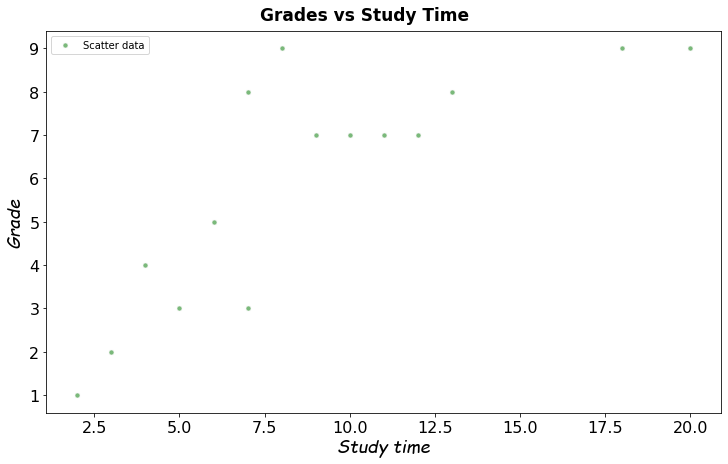

In [28]:
# your code here
fig = plt.figure(figsize=[10,6],constrained_layout=True)
fig.suptitle('Grades vs Study Time', size=17, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
label_prop = {'size':18,'family':'fantasy','style':'oblique'}
axis = fig.add_subplot(spec[0,0])
x = 'Study time'
y = 'Grade'
plot_var = timeG.plot.scatter(x,y,s=25,alpha=0.6,marker='o',ec='whitesmoke',fc='forestgreen',label='Scatter data',ax=axis)
plt.sca(plot_var)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Study time',fontdict=label_prop)
plt.ylabel('Grade',fontdict=label_prop)

Refer to comments in the previous question above.

#### Could you explain the difference between Pearson and Spearman correlations?

Pearson correlation is a meassure of the linear relation between two variables, that is how far away is the relation between two variables from a linear function. On the other hand, Spearman is a messure of the monotonicity of the relation, independently of the linearity. In simple words, for every increase in one variable for multiple observations, a perfect monotonicity will require that the other variable always increases or decreases with no alternations.